In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, rfftfreq
from scipy.signal import stft
import librosa


In [46]:
# y, sr = librosa.load('autre_data/piano.mp3', sr=None, duration=None)  # y is the time series, sr is the sampling rate
y, sr = librosa.load('simple_piano/anniversary-song-glen-miller-waltz-piano-level-6.wav', sr=None, duration=10)  # y is the time series, sr is the sampling rate
Audio(y, rate=sr)

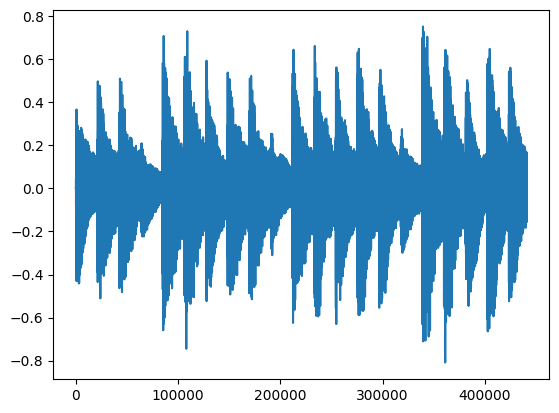

In [47]:
plt.plot(y)

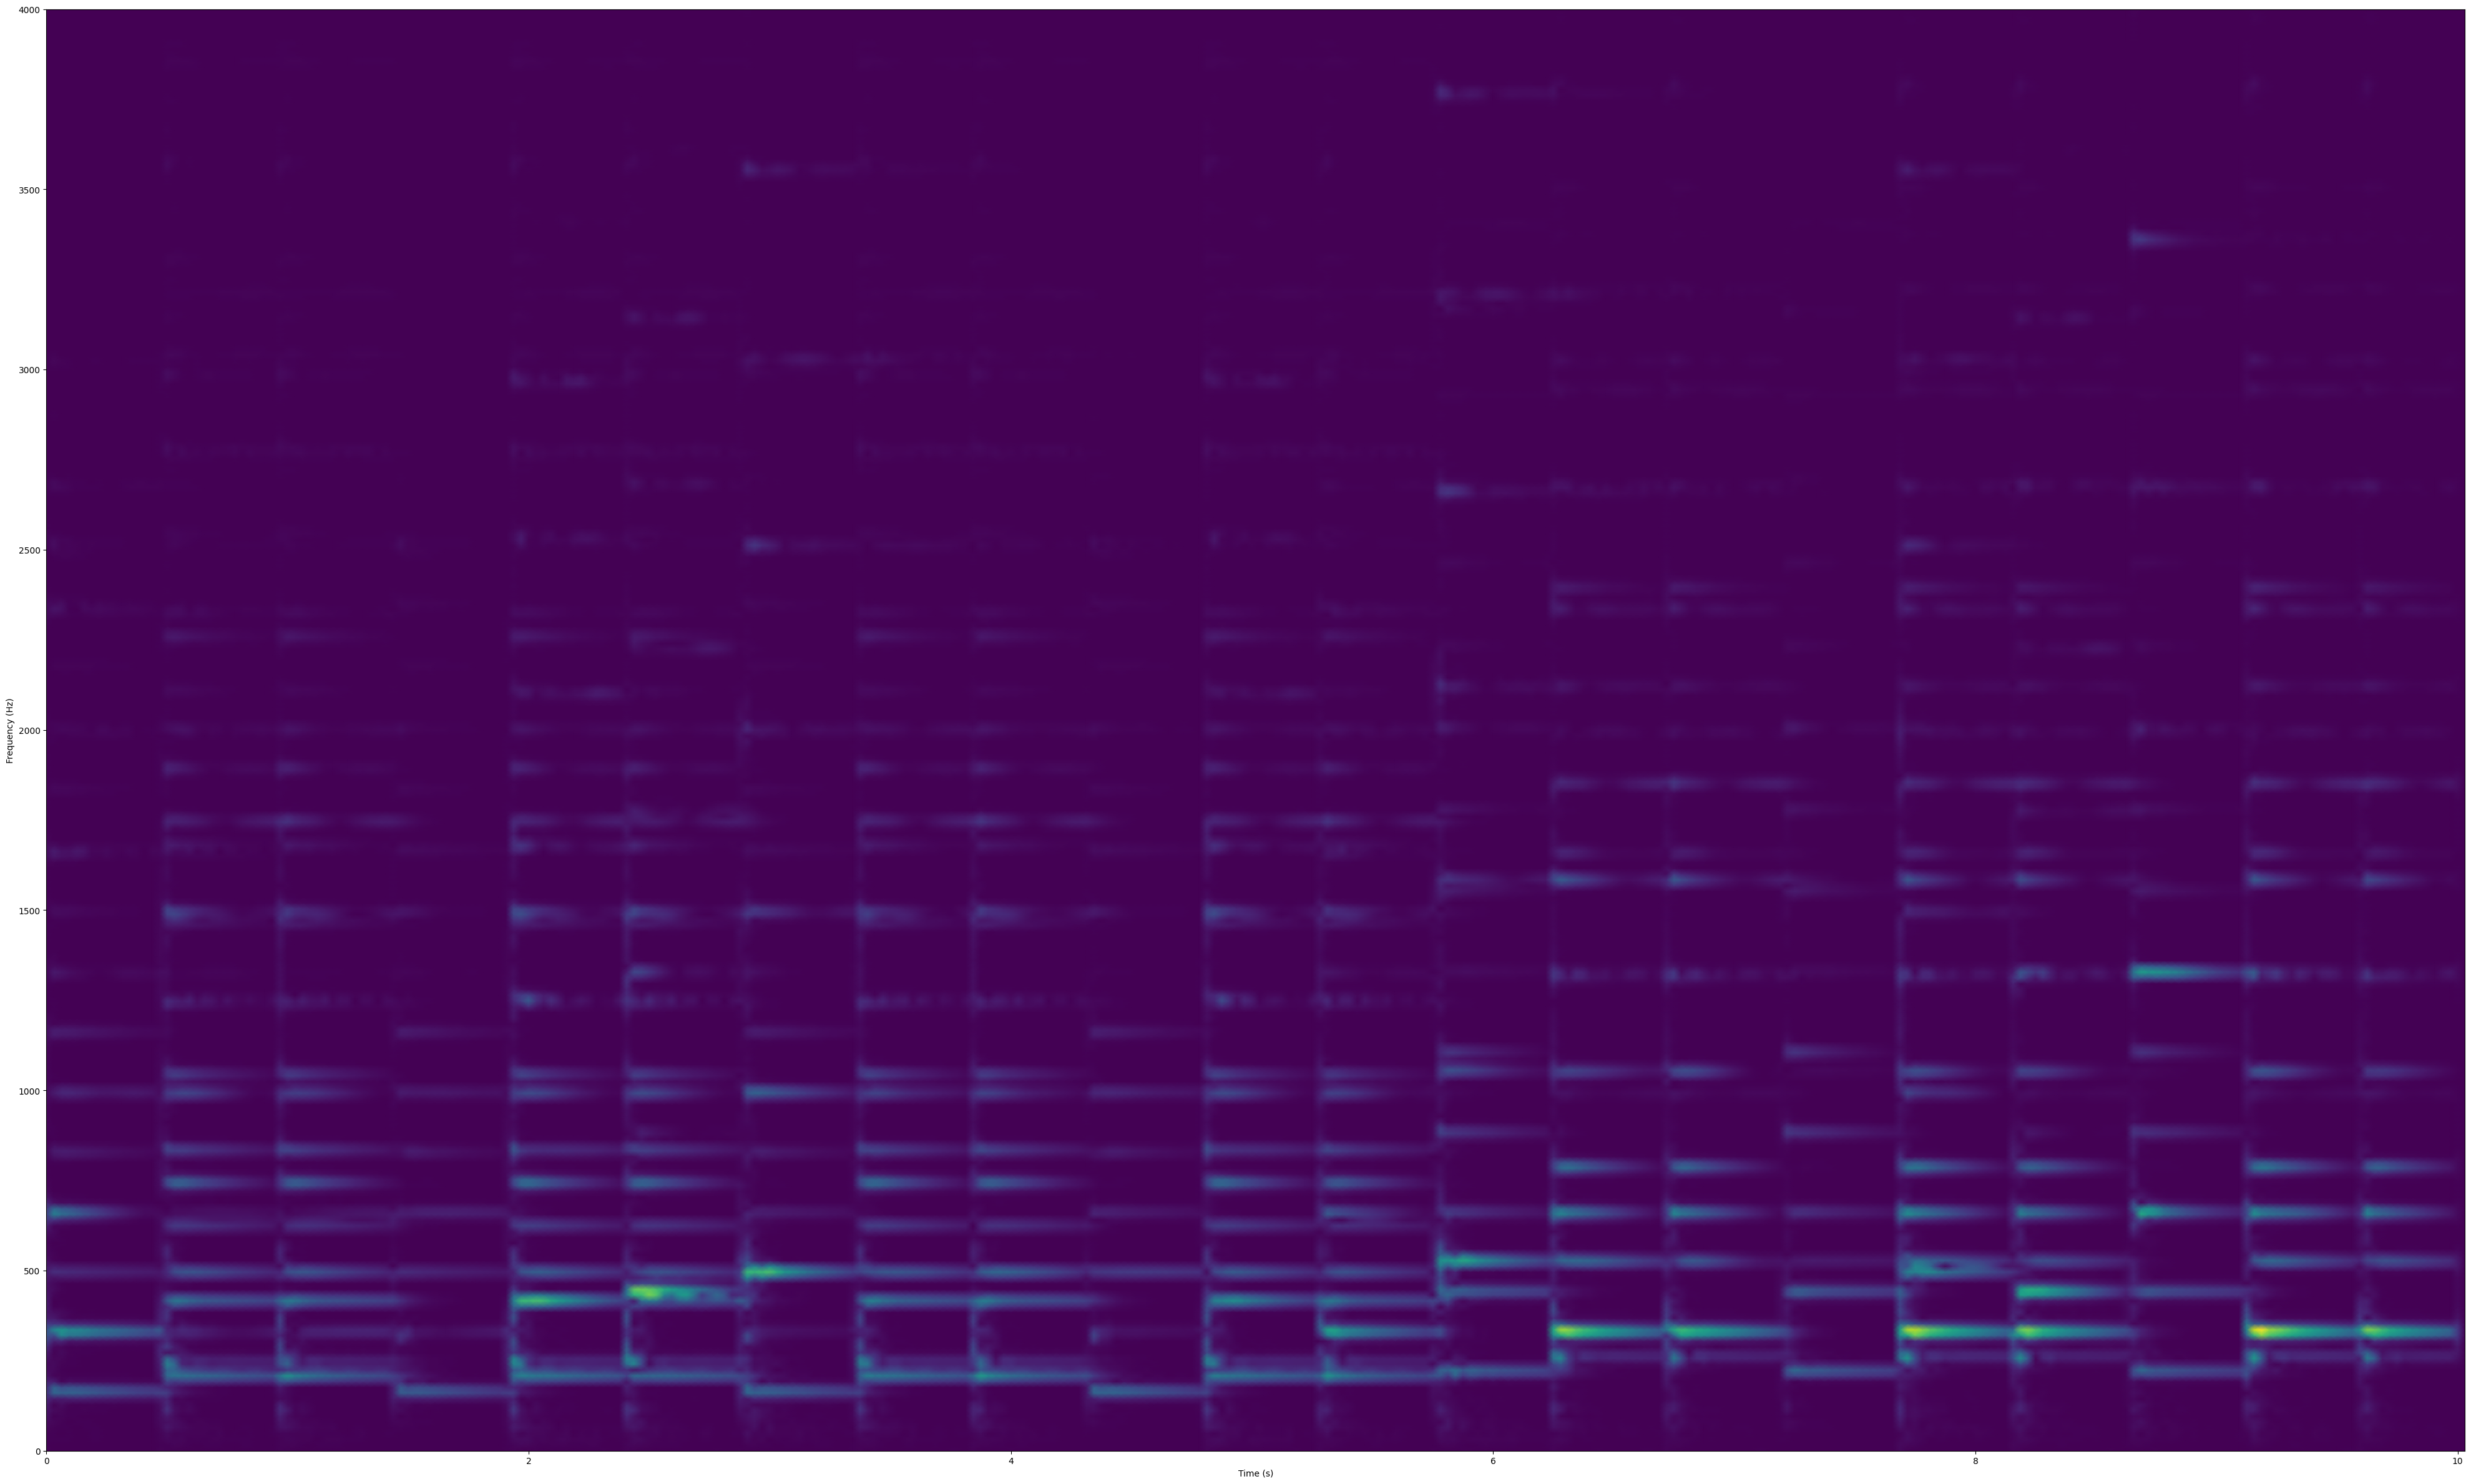

In [48]:
f, t, Zxx = stft(y, fs=sr, nperseg=sr//16, noverlap=sr//32)
fig, ax = plt.subplots(figsize=(50, 30))
ax.set_ylim([0, 4000])
ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading="gouraud")
ax.set_xlabel("Time (s)")
_ = ax.set_ylabel("Frequency (Hz)")

In [49]:
from basic_pitch.models import get_cqt
from basic_pitch.nn import HarmonicStacking
from basic_pitch.layers.nnaudio import CQT

In [52]:
from torch_nnaudio import CQT
import torch

cqt = CQT(44100, 512, 27.5, None, 88)
cqt.build(t.shape)
cqt(torch.Tensor(t))

TypeError: conv1d() received an invalid combination of arguments - got (Tensor, numpy.ndarray, stride=int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, tuple of ints padding = 0, tuple of ints dilation = 1, int groups = 1)
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, str padding = "valid", tuple of ints dilation = 1, int groups = 1)
